In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
prod = pd.read_csv("ml.csv", index_col = None,delimiter =";")

In [3]:
pd.read_csv?

In [4]:
prod.head()

,_product_category_name_,_product_name_lenght_,_product_weight_g_,_product_length_cm_,_product_height_cm_,_product_width_cm_,_seller_city_,_seller_state_,_payment_type_,_payment_installments_,_payment_value_,_price_,_freight_value_
0,cool_stuff,58.0,650.0,28.0,9.0,14.0,volta redonda,SP,credit_card,2,72.19,58.90,13.29
1,pet_shop,56.0,30000.0,50.0,30.0,40.0,sao paulo,SP,credit_card,3,259.83,239.90,19.93
2,moveis_decoracao,59.0,3050.0,33.0,13.0,33.0,borda da mata,MG,credit_card,5,216.87,199.00,17.87
3,perfumaria,42.0,200.0,16.0,10.0,15.0,franca,SP,credit_card,2,25.78,12.99,12.79
4,ferramentas_jardim,59.0,3750.0,35.0,40.0,30.0,loanda,PR,credit_card,3,218.04,199.90,18.14


In [5]:
prod.dtypes#ridge,losso

_product_category_name_     object
_product_name_lenght_      float64
_product_weight_g_         float64
_product_length_cm_        float64
_product_height_cm_        float64
_product_width_cm_         float64
_seller_city_               object
_seller_state_              object
_payment_type_              object
_payment_installments_       int64
_payment_value_            float64
_price_                    float64
_freight_value_            float64
dtype: object

In [6]:
prod["_product_category_name_"].value_counts()#onehotecoder

cama_mesa_banho                                  7095
beleza_saude                                     6027
esporte_lazer                                    5482
moveis_decoracao                                 5255
informatica_acessorios                           4973
                                                 ... 
la_cuisine                                         10
portateis_cozinha_e_preparadores_de_alimentos       7
pc_gamer                                            7
fashion_roupa_infanto_juvenil                       3
seguros_e_servicos                                  1
Name: _product_category_name_, Length: 73, dtype: int64

In [7]:
prod.dropna(inplace = True)

In [8]:
prod.isnull().sum()

_product_category_name_    0
_product_name_lenght_      0
_product_weight_g_         0
_product_length_cm_        0
_product_height_cm_        0
_product_width_cm_         0
_seller_city_              0
_seller_state_             0
_payment_type_             0
_payment_installments_     0
_payment_value_            0
_price_                    0
_freight_value_            0
dtype: int64

In [9]:
prod["_payment_type_"].value_counts()

credit_card    52993
boleto         14386
voucher         1980
debit_card      1053
Name: _payment_type_, dtype: int64

In [10]:
prod["_payment_type_"] = prod["_payment_type_"].map({'credit_card': 0, 'boleto': 1, 'voucher': 2, 'debit_card': 3})

In [11]:
corr_matrix = prod[['_product_name_lenght_','_product_weight_g_','_product_length_cm_','_product_height_cm_','_product_width_cm_','_payment_type_','_payment_installments_','_payment_value_','_price_','_freight_value_','_product_category_name_']].corr()

In [12]:
corr_matrix

,_product_name_lenght_,_product_weight_g_,_product_length_cm_,_product_height_cm_,_product_width_cm_,_payment_type_,_payment_installments_,_payment_value_,_price_,_freight_value_
_product_name_lenght_,1.000000,0.023151,0.058972,-0.026293,0.064073,0.004536,0.020763,0.000927,0.017286,0.024410
_product_weight_g_,0.023151,1.000000,0.458096,0.584623,0.502930,-0.027113,0.182935,0.293698,0.334859,0.613853
_product_length_cm_,0.058972,0.458096,1.000000,0.188983,0.530867,-0.015714,0.121745,0.137359,0.146124,0.305605
_product_height_cm_,-0.026293,0.584623,0.188983,1.000000,0.279040,-0.025130,0.126292,0.206577,0.222605,0.390955
_product_width_cm_,0.064073,0.502930,0.530867,0.279040,1.000000,-0.023136,0.141803,0.140705,0.163296,0.321546
_payment_type_,0.004536,-0.027113,-0.015714,-0.025130,-0.023136,1.000000,-0.364168,-0.038068,-0.050106,-0.020381
_payment_installments_,0.020763,0.182935,0.121745,0.126292,0.141803,-0.364168,1.000000,0.244920,0.280994,0.189912
_payment_value_,0.000927,0.293698,0.137359,0.206577,0.140705,-0.038068,0.244920,1.000000,0.736581,0.361490
_price_,0.017286,0.334859,0.146124,0.222605,0.163296,-0.050106,0.280994,0.736581,1.000000,0.416981
_freight_value_,0.024410,0.613853,0.305605,0.390955,0.321546,-0.020381,0.189912,0.361490,0.416981,1.000000


<AxesSubplot:>

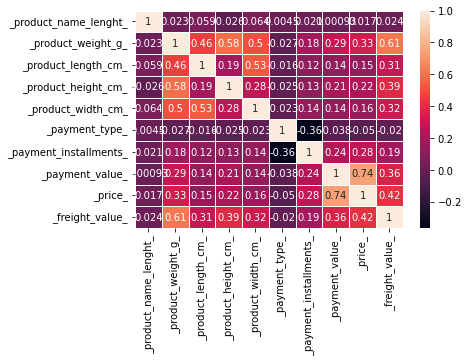

In [13]:
sns.heatmap(data = corr_matrix,annot = True,linewidths =0.5)

In [14]:
prod["_product_category_name_"].unique()

array(['cool_stuff', 'pet_shop', 'moveis_decoracao', 'perfumaria',
       'ferramentas_jardim', 'utilidades_domesticas', 'telefonia',
       'beleza_saude', 'livros_tecnicos', 'fashion_bolsas_e_acessorios',
       'cama_mesa_banho', 'esporte_lazer', 'consoles_games',
       'moveis_escritorio', 'malas_acessorios', 'alimentos',
       'agro_industria_e_comercio', 'eletronicos',
       'informatica_acessorios', 'construcao_ferramentas_construcao',
       'audio', 'bebes', 'construcao_ferramentas_iluminacao',
       'brinquedos', 'papelaria', 'industria_comercio_e_negocios',
       'relogios_presentes', 'automotivo', 'eletrodomesticos',
       'moveis_cozinha_area_de_servico_jantar_e_jardim', 'climatizacao',
       'casa_conforto', 'telefonia_fixa', 'portateis_casa_forno_e_cafe',
       'fraldas_higiene', 'sinalizacao_e_seguranca',
       'instrumentos_musicais', 'eletroportateis',
       'construcao_ferramentas_jardim', 'artes', 'casa_construcao',
       'livros_interesse_geral', 'artigo

In [15]:
prod["_product_category_name_"].replace(['perfumaria', 'artes', 'bebes',
       'instrumentos_musicais', 'cool_stuff','utilidades_domesticas'
       'eletrodomesticos', 'brinquedos',
       'construcao_ferramentas_seguranca',
       'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio',
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim','eletrodomesticos',
       'industria_comercio_e_negocios', 'telefonia_fixa',
       'construcao_ferramentas_iluminacao', 'livros_tecnicos',
       'eletrodomesticos_2', 'artigos_de_festas', 'bebidas',
       'market_place', 'la_cuisine', 'construcao_ferramentas_jardim',
       'fashion_roupa_feminina', 'casa_conforto', 'audio',
       'alimentos_bebidas', 'musica', 'alimentos',
       'tablets_impressao_imagem', 'livros_importados',
       'portateis_casa_forno_e_cafe', 'fashion_esporte',
       'artigos_de_natal', 'fashion_roupa_infanto_juvenil',
       'dvds_blu_ray', 'artes_e_artesanato', 'pc_gamer', 'moveis_quarto',
       'cine_foto', 'fraldas_higiene', 'flores', 'casa_conforto_2',
       'portateis_cozinha_e_preparadores_de_alimentos',
       'seguros_e_servicos', 'moveis_colchao_e_estofado',
       'cds_dvds_musicais'], 'Others', inplace=True)

prod["_product_category_name_"].value_counts()

Others                    37103
cama_mesa_banho            7095
beleza_saude               6027
esporte_lazer              5482
moveis_decoracao           5255
informatica_acessorios     4973
utilidades_domesticas      4477
Name: _product_category_name_, dtype: int64

In [16]:
condition = prod['_product_category_name_'] == 'Others'
index_to_drop = prod[condition].index
prod.drop(index_to_drop, inplace=True)


In [17]:
prod["_product_category_name_"].value_counts()

cama_mesa_banho           7095
beleza_saude              6027
esporte_lazer             5482
moveis_decoracao          5255
informatica_acessorios    4973
utilidades_domesticas     4477
Name: _product_category_name_, dtype: int64

In [18]:
prod["_product_category_name_"] = prod["_product_category_name_"].map({'cama_mesa_banho': 0, 'esporte_lazer': 1, 'moveis_decoracao': 2
                                                                  ,'beleza_saude': 3, 'utilidades_domesticas': 4, 'informatica_acessorios': 5})

In [19]:
prod["_product_category_name_"].value_counts()

0    7095
3    6027
1    5482
2    5255
5    4973
4    4477
Name: _product_category_name_, dtype: int64

In [20]:
#col1 = [1] 
#y = prod.iloc[:,col1]
y = prod._product_category_name_
y

2        2
5        4
8        3
10       3
12       0
        ..
71418    4
71419    5
71420    1
71421    5
71422    0
Name: _product_category_name_, Length: 33309, dtype: int64

In [21]:
prod.head()

,_product_category_name_,_product_name_lenght_,_product_weight_g_,_product_length_cm_,_product_height_cm_,_product_width_cm_,_seller_city_,_seller_state_,_payment_type_,_payment_installments_,_payment_value_,_price_,_freight_value_
2,2,59.0,3050.0,33.0,13.0,33.0,borda da mata,MG,0,5,216.87,199.00,17.87
5,4,36.0,450.0,24.0,8.0,15.0,ribeirao preto,SP,1,1,34.59,21.90,12.69
8,3,59.0,2000.0,30.0,12.0,16.0,sao paulo,SP,0,3,157.60,145.95,11.65
10,3,57.0,950.0,35.0,25.0,20.0,santo andre,SP,0,3,68.87,59.99,8.88
12,0,54.0,1383.0,50.0,10.0,40.0,ibitinga,SP,0,4,97.32,74.00,23.32


In [22]:
col = [2,3,4,5,9,10,11,12]
x = prod.iloc[:,col]
x

,_product_weight_g_,_product_length_cm_,_product_height_cm_,_product_width_cm_,_payment_installments_,_payment_value_,_price_,_freight_value_
2,3050.0,33.0,13.0,33.0,5,216.87,199.00,17.87
5,450.0,24.0,8.0,15.0,1,34.59,21.90,12.69
8,2000.0,30.0,12.0,16.0,3,157.60,145.95,11.65
10,950.0,35.0,25.0,20.0,3,68.87,59.99,8.88
12,1383.0,50.0,10.0,40.0,4,97.32,74.00,23.32
...,...,...,...,...,...,...,...,...
71418,10150.0,89.0,15.0,40.0,1,343.40,299.99,43.41
71419,8950.0,45.0,26.0,38.0,1,386.53,350.00,36.53
71420,967.0,21.0,24.0,19.0,3,116.85,99.90,16.95
71421,100.0,20.0,20.0,20.0,3,64.71,55.99,8.72


In [23]:
x.var()

_product_weight_g_        1.164391e+07
_product_length_cm_       2.659069e+02
_product_height_cm_       1.476913e+02
_product_width_cm_        1.234500e+02
_payment_installments_    7.645642e+00
_payment_value_           4.088484e+04
_price_                   2.103081e+04
_freight_value_           2.176742e+02
dtype: float64

In [24]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x = scaler.fit_transform(x)

In [25]:
print(x.shape)
print(y.shape)

(33309, 8)
(33309,)


In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state= 5)
print(x_train.shape)

(26647, 8)


In [28]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
x_train= sc.fit_transform(x_train)

In [29]:
x_test = sc.transform(x_test)

In [30]:
#from imblearn.under_sampling import RandomUnderSampler 
    #Define the RandomUnderSampler object
#rus = RandomUnderSampler(random_state=0)

# Fit the RandomUnderSampler to the training data
#x_resampled, y_resampled = rus.fit_resample(x_train, y_train)

In [31]:
#from imblearn.over_sampling import RandomOverSampler

# Define the RandomOverSampler object
#ros = RandomOverSampler(random_state=0)

# Fit the RandomOverSampler to the training data
#x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

In [32]:
#y_resampled.value_counts()

In [33]:
from sklearn.feature_selection import VarianceThreshold

In [34]:
sel = VarianceThreshold(threshold=(0.5))
sel.fit(x_train)

print("sélection de variable: ", sel.get_support())
print("variable sélectionnées: ", list(x.columns[sel.get_support()]))
print("variable suprrimées: ", list(x.columns[~sel.get_support()]))

sélection de variable:  [ True  True  True  True  True  True  True  True]
variable sélectionnées:  ['_product_weight_g_', '_product_length_cm_', '_product_height_cm_', '_product_width_cm_', '_payment_installments_', '_payment_value_', '_price_', '_freight_value_']
variable suprrimées:  []


In [35]:
KNN = KNeighborsClassifier(n_neighbors= 1)
KNN.fit(x_train,y_train)
print(KNN.score(x_train,y_train))
print(KNN.score(x_test,y_test))

1.0
0.7349144401080756


In [36]:
#KNN = KNeighborsClassifier(n_neighbors= 1)
#KNN.fit(x_resampled,y_resampled)

In [37]:
y_pred = KNN.predict(x_test)
print(y_pred)
print(y_test)

[4 4 2 ... 0 4 0]
22580    4
27033    4
71367    2
14229    3
29542    5
        ..
60718    5
44744    5
19244    0
47706    4
9553     0
Name: _product_category_name_, Length: 6662, dtype: int64


In [38]:
print(KNN.score(x_test,y_test)) 
print(KNN.score(x_train,y_train)) 

0.7349144401080756
1.0


In [39]:
#print(KNN.score(x_test,y_test)) 
#print(KNN.score(x_resampled,y_resampled)) 

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

cross_val_score(KNeighborsClassifier(n_neighbors=3),x,y, cv = 5)

array([0.65746022, 0.65520865, 0.65310718, 0.64860402, 0.66416454])

In [41]:
cross_val_score(KNeighborsClassifier(n_neighbors=3),x,y, cv = 5).mean()

0.6557089211810224

In [42]:
val_score = []
k = np.arange(1,21)
for i in k:
    score = cross_val_score(KNeighborsClassifier(n_neighbors=i),x,y, cv = 5)
    val_score.append(score.mean())
    print(i, ':', score.mean())

1 : 0.6981598258249322
2 : 0.6661864761570901
3 : 0.6557089211810224
4 : 0.64306961878269
5 : 0.6330123264636844
6 : 0.6246963566584884
7 : 0.6166804888327999
8 : 0.6103759270131939
9 : 0.6056023963809646
10 : 0.6002284544684958
11 : 0.5940739751875255
12 : 0.5904413332539503
13 : 0.5848873283509837
14 : 0.5821253138719398
15 : 0.5769915851469846
16 : 0.574049376974932
17 : 0.5709871613627512
18 : 0.5690356241412224
19 : 0.5657632569190867
20 : 0.5613499784633811


meilleur valeur=  1


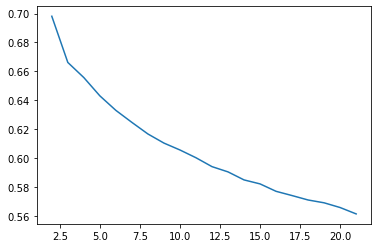

In [43]:
import matplotlib.pyplot as plt
plt.plot(k+1, val_score)
print('meilleur valeur= ',np.argmax(val_score)+1)

In [44]:
from sklearn.model_selection import validation_curve
model=KNeighborsClassifier()
K=np.arange(1,21)
train_score,val_score=validation_curve(model,x_train,y_train,param_name='n_neighbors',param_range=K,cv=5)
print(val_score.shape)
print(train_score.shape)

(20, 5)
(20, 5)


In [45]:
val_score.mean(axis=1)

array([0.70409405, 0.65504536, 0.64506292, 0.63534336, 0.62855079,
       0.62051993, 0.61935645, 0.61425259, 0.61102514, 0.60700975,
       0.60502083, 0.60168086, 0.59698991, 0.59458807, 0.59184855,
       0.5881709 , 0.58790834, 0.58644468, 0.58389278, 0.58239166])

In [46]:
train_score.mean(axis=1)

array([1.        , 0.84957031, 0.81406912, 0.77499341, 0.75075052,
       0.72881561, 0.71384204, 0.69861522, 0.68720679, 0.67795625,
       0.66975645, 0.66332044, 0.65715651, 0.65153677, 0.64572936,
       0.64151686, 0.63741696, 0.63327014, 0.62822266, 0.62456369])

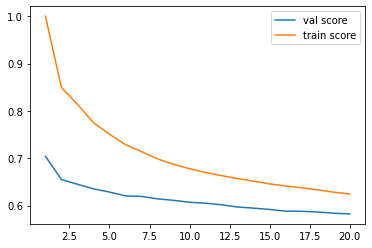

In [47]:
import matplotlib.pyplot as plt
plt.plot(K,val_score.mean(axis=1),label='val score')
plt.plot(K,train_score.mean(axis=1),label='train score')
plt.legend()
plt.show()

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
K_range=list(range(1,31))
weight_option=['uniform','distance']
metric_distance=['euclidean','manhattan','minkowski']

In [50]:
param_grid=dict(n_neighbors=K_range,weights=weight_option,metric=metric_distance)

In [51]:
rand=RandomizedSearchCV(KNeighborsClassifier(),param_grid,cv=5)
rand.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'distance']})

In [52]:
print(rand.best_score_)
print(rand.best_params_)

0.7613984650521044
{'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan'}


In [53]:
Final_model_new=rand.best_estimator_
Final_model_new.fit(x_train,y_train)
Final_model_new.score(x_test,y_test)

0.7788952266586611

C:\Users\chleg\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (33309).

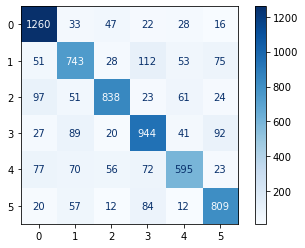

In [54]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Final_model_new, x_test, y_test,display_labels=y,cmap=plt.cm.Blues)  
plt.show()

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.806052  0.833570  0.819580      1406
           1   0.645985  0.666667  0.656163      1062
           2   0.777242  0.736746  0.756452      1094
           3   0.716406  0.716406  0.716406      1213
           4   0.690391  0.651736  0.670507       893
           5   0.744848  0.763581  0.754098       994

    accuracy                       0.734914      6662
   macro avg   0.730154  0.728118  0.728868      6662
weighted avg   0.734846  0.734914  0.734625      6662

